<a href="https://colab.research.google.com/github/ggarcia-de-souza/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC GENERAL.csv')
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [21]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [22]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [23]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values) 
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

y_pred

array([2, 3, 2, ..., 2, 2, 4], dtype=int32)

In [25]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette) 

0.36459930079687725


In [26]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0756029772618627


In [27]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.786045429666


In [28]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [29]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [30]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36443927743081506 1.0758787031571042 3431.782548172111


In [31]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3514205232297522 1.116423701164215 3019.1944499679216


In [32]:
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.03986963602548431 3.5067187217556737 303.2825915653233
0.36443927743081506 1.0758787031571042 3431.782548172111


In [33]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3709892317069683 1.0421931450476152 1200.2020718284073
0.3533722290068982 1.142494501324114 1194.9475522947623
0.3668564117315988 1.0993525253456347 1167.5313082261505


<function matplotlib.pyplot.show(close=None, block=None)>

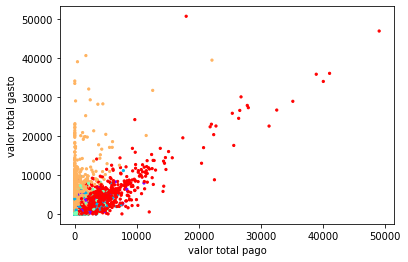

In [34]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

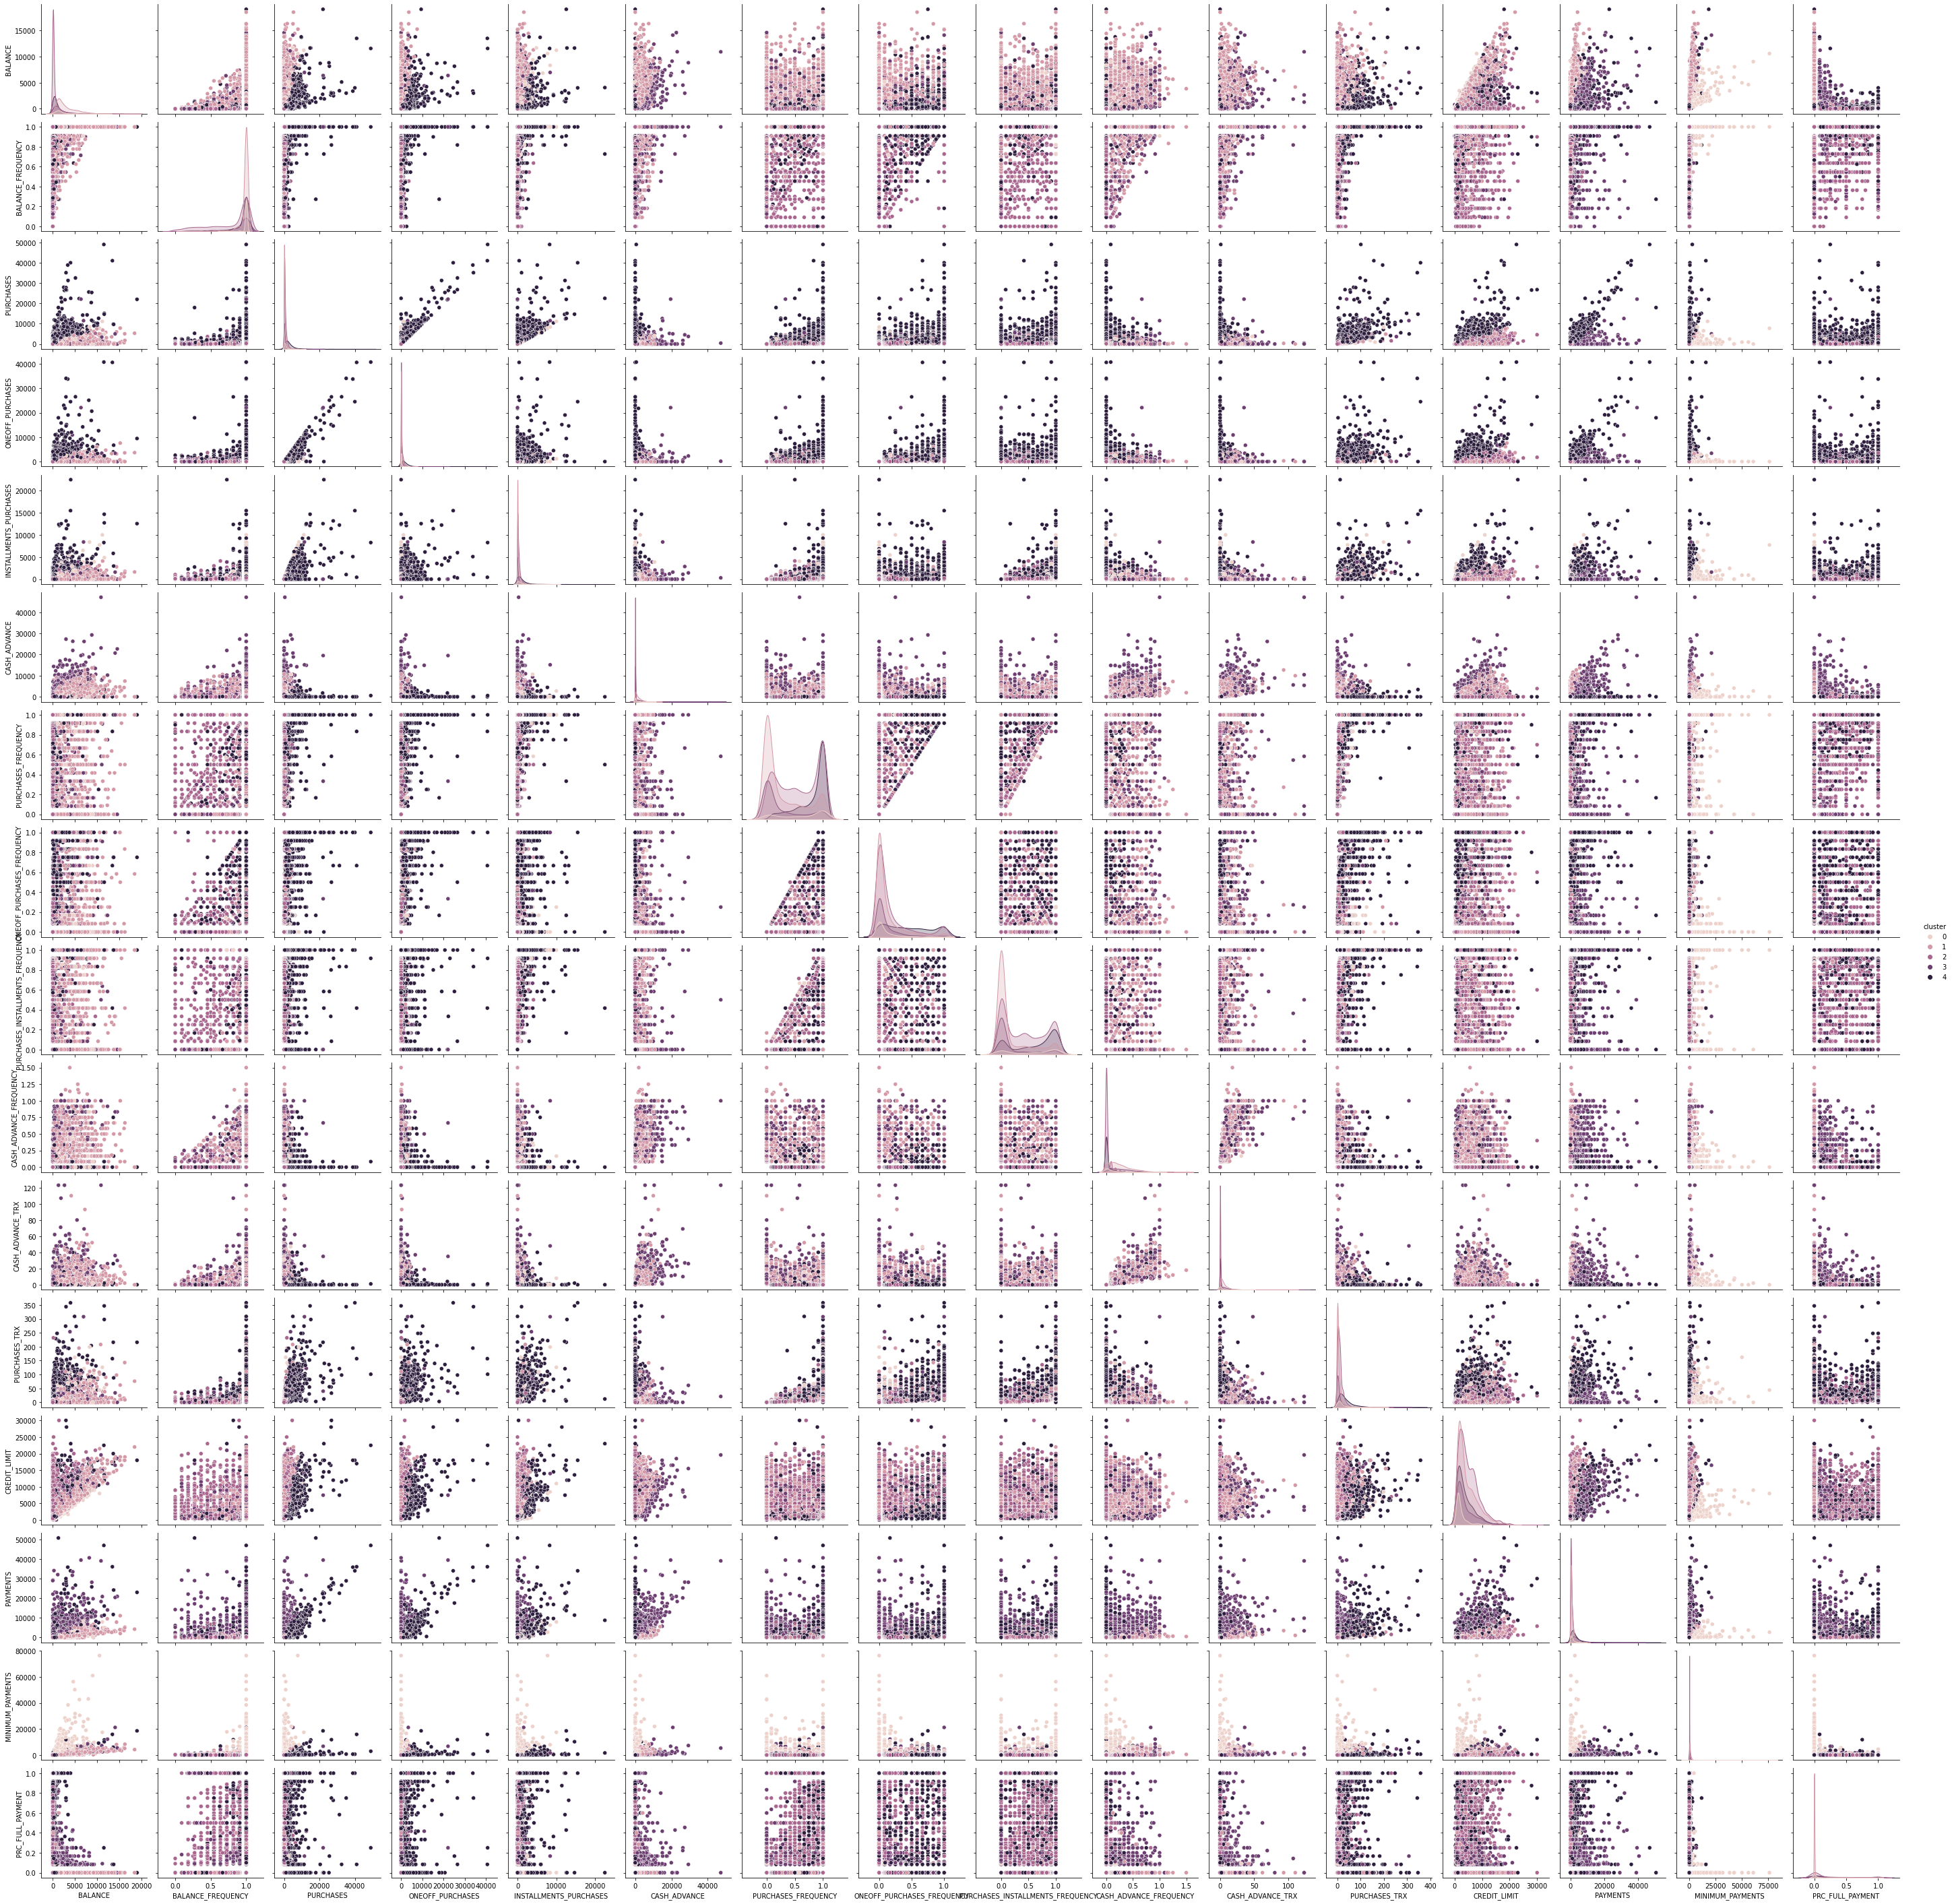

In [35]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [36]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         409.0  1989.027555  1858.869791  70.794108  1016.583226   
1        2651.0  3036.934613  2478.185068   6.824905  1257.895616   
2        3280.0   443.746756   846.398201   0.000000    23.365333   
3        1074.0  1794.443291  1981.773996   0.000000   507.348768   
4        1536.0  1142.514535  1664.888183   0.000000   212.178230   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1330.716005  2149.205166  11670.179850             409.0  0.989435   
1        2173.970603  4223.849965  18495.558550            2651.0  0.963768   
2          82.941478   410.126095   9630.367575            3280.0  0.774389   
3        1087.920500  2312.923253  14581.459140            1074.0  0.862388   
4         554.332740  1370.859355  19043.138560            1536.0  0.928220   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      7164.306187  76406.207520            409.0  0.019413   
1        ...      1330.489499   8345.641905           2651.0  0.001798   
2        ...       248.733727   4483.503862           3280.0  0.246806   
3        ...       883.991828  21235.065300           1074.0  0.117321   
4        ...       524.184580  18621.013310           1536.0  0.278331   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.091113  0.0  0.0  0.000000  0.000000  1.0  
1        0.023251  0.0  0.0  0.000000  0.000000  0.6  
2        0.346748  0.0  0.0  0.000000  0.444444  1.0  
3        0.186720  0.0  0.0  0.083333  0.142857  1.0  
4        0.367137  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [37]:
centroids = kmeans.cluster_centers_
print(centroids)

[[3.31819573e-01 2.68108548e-04 1.57897411e-01 3.53667582e-02
  1.22917205e-01 5.86410734e-02 1.66414675e-04 2.54680510e-05
  1.47782323e-04 1.94162395e-05 4.30027427e-04 3.85903103e-03
  3.75754913e-01 2.51801450e-01 6.81590209e-01 4.26067138e-06]
 [5.04304115e-01 2.72240037e-04 6.19065286e-02 3.63718661e-02
  2.55563592e-02 2.52712219e-01 6.74445184e-05 2.58563809e-05
  4.50311640e-05 5.73955073e-05 1.15600055e-03 1.33430324e-03
  7.19065068e-01 1.66279141e-01 1.79426352e-01 5.51886878e-07]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [2.34955101e-01 2.16241674e-04 6.09376425e-02 3.48207303e-02
  2.61221122e-02 3.99771273e-01 5.27678241e-05 2.06705276e-05
  3.52208917e-05 6.53734596e-05 1.56898861e-03 1.12880913e-03
  5.35553118e-01 5.97717529e-01 1.04179623e-01 2.76913169e-05]
 [1.

In [39]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0361
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0546
PRC_FULL_PAYMENT 
0.0000


In [ ]:
#BALANCE 0.0224
#PURCHASES 0.0196
#CASH_ADVANCE 0.0226
#CREDIT_LIMIT 0.0360
#PAYMENTS 0.0280
#MINIMUM_PAYMENTS 0.0542

In [48]:
dataframe.groupby("cluster")["BALANCE"].describe()

count         mean          std        min          25%  \
cluster                                                             
0         409.0  1989.027555  1858.869791  70.794108  1016.583226   
1        2651.0  3036.934613  2478.185068   6.824905  1257.895616   
2        3280.0   443.746756   846.398201   0.000000    23.365333   
3        1074.0  1794.443291  1981.773996   0.000000   507.348768   
4        1536.0  1142.514535  1664.888183   0.000000   212.178230   

                 50%          75%           max  
cluster                                          
0        1330.716005  2149.205166  11670.179850  
1        2173.970603  4223.849965  18495.558550  
2          82.941478   410.126095   9630.367575  
3        1087.920500  2312.923253  14581.459140  
4         554.332740  1370.859355  19043.138560

In [49]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1989.027555   855.672225    423.188665   2230.195599  1338.842680   
1        3036.934613   385.478510   1635.682267   4493.681630   968.765803   
2         443.746756   629.249107    141.482978   5130.547795   814.294226   
3        1794.443291   478.411620   3266.686592   3983.399639  4712.044614   
4        1142.514535  3274.126719    181.727235   4096.718849  3036.609179   

         n_clients  
cluster             
0              409  
1             2651  
2             3280  
3             1074  
4             1536  


<ipython-input-49-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [50]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0         409.0  0.019413  0.091113  0.0  0.0  0.000000  0.000000  1.0
1        2651.0  0.001798  0.023251  0.0  0.0  0.000000  0.000000  0.6
2        3280.0  0.246806  0.346748  0.0  0.0  0.000000  0.444444  1.0
3        1074.0  0.117321  0.186720  0.0  0.0  0.083333  0.142857  1.0
4        1536.0  0.278331  0.367137  0.0  0.0  0.083333  0.545455  1.0

In [ ]:
#CLUSTER 0: Clientes que compram mais do que sacam dinheiro. Pagam mal também
#CLUSTER 1: Clientes que sacam mais do que compram. Piores pagadores. Segundo maior número de clientes
#CLUSTER 2: Clientes que tem o maior limite de crédito. Pagam bem também. Maior número de clientes
#CLUSTER 3: Clientes que mais sacam dinheiro. Pagam mais ou menos
#CLUSTER 4: Clientes que mais compram. Melhores pagadores

In [51]:
# Nesse caso, seria interessante pegar o CLUSTER 1, onde a gente tem o segundo maior número de cleintes e criar uma estratégia
# onde a gente consiga fazer com que eles paguem mais. Eles sacam mais do que compram sendo que eles tem na conta deles (BALANCE) muito dinheiro
# Que tal criar um grupo de controle e um grupo de teste?
# Depois, usamos nossa estratégia no grupo de teste durante 1 ano e comparamos com o grupo de controle para ver se conseguimos melhorar nosso resultado